In [1]:
#Supervised Learning: Logistic Regression
#Binary Classification
#1 or 0

In [90]:
#Data Imports
import numpy as np
from numpy import *
import pandas as pd
from pandas import Series,DataFrame

#Math
import math

#Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#For evaluating our ML results
from sklearn import metrics

#Dataset Import
import statsmodels.api as sm

Text(0.5, 1.0, 'Logistic Function')

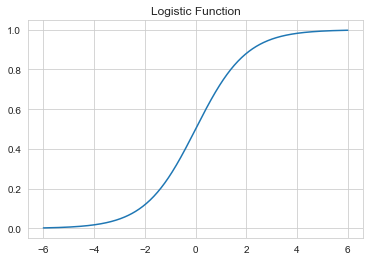

In [28]:
#Logisitics Function
#Can take an input from neg infin to pos infin.
#Output must be between 01
#sig(t)=1/(1+e^(-t))

def logistic(t):
    return 1.0/(1+math.exp((-1.0)*t))

#set t from -6 to 6 (500 elements, linearly spaced)
t=np.linspace(-6,6,500)

#set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

#Plot
plt.plot(t,y)
plt.title('Logistic Function')

#What does it mean??
#No matter what value we have for our T value, the results will always
#either be 0 or 1.

In [29]:
#Linear Regression is like y=mx+b but for multiple data features.
#Logistic Regression
#f(x) is the probability that the DVar is a "success" case
#similar style of thinking as in the binomial distribution

In [30]:
df = sm.datasets.fair.load_pandas().data

In [31]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [32]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [33]:
#Checking for whether they had an affair at all, applying the function
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [34]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [35]:
#Groupby needs an aggregate function at end
df.groupby('Had_Affair').mean()

#Brief glance: Women who had affairs were slightly older.. a little.
#slightly less religious
#slightly worse marriages
#more children.
#slightly less educated

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


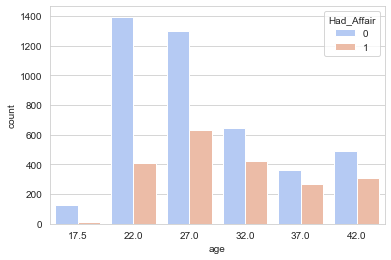

In [36]:
#Percentage-wise, older women were more likely to have had an affair(?)
sns.countplot('age',data=df,hue='Had_Affair',palette='coolwarm')

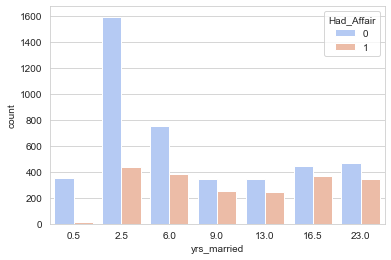

In [37]:
#Probability of affair increases with years married.
#That kinda' makes sense though.. 
sns.countplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm')

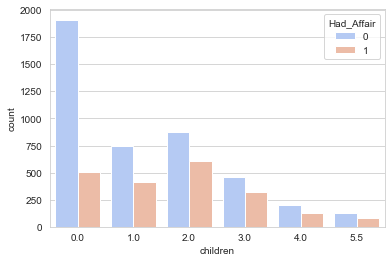

In [38]:
#Women without children were less likely to have an affair(?)
sns.countplot('children',data=df,hue='Had_Affair',palette='coolwarm')

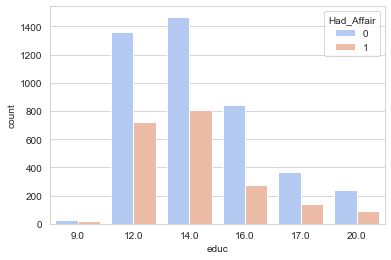

In [39]:
#Can't make any determinations.. 
sns.countplot('educ',data=df,hue='Had_Affair',palette='coolwarm')

In [40]:
#Part 5 - Data Preparation
#Dummie Variables
occ_dummies = pd.get_dummies(['occupation'])

In [62]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [45]:
dummies_new = {1.0:[0,0,0,0,0],2.0:[1,0,0,0,0],3.0:[0,1,1,0,1],4.0:[0,0,0,0,0],5.0:[0,0,0,1,0],6.0:[0,0,0,0,0]}

In [53]:
occ_dummies = pd.DataFrame(data=dummies_new)

In [54]:
dummies_new_df

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [57]:
occ_dummies

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [58]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [59]:
occ_dummies

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [64]:
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [65]:
#Dropping a bunch of columns and perhaps replacing them..
X = df.drop(['occupation','occupation_husb','Had_Affair'], axis=1)

In [66]:
#Concatenate the dummie frames together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [68]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0


In [69]:
#Let's concat all together
X = pd.concat([X,dummies],axis=1)

In [70]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0


In [71]:
Y = df.Had_Affair

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [73]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [74]:
#We prepped the data
#Realized the husband occupation and wife occupation were categorical var.
#Used get dummies to make dummie dataframes
#Dropped the original columns, and inserted the dummie cats.
#Setup target class Y as "Had_Affair" column from earlier

In [75]:
#Part 6 - Multicollineartiy Consideration
#We need to get rid of a few columns, ie. occ1 & hocc1
#The dummie variables are highly correlated :\
#One of the dummy variables can be predicted from the others
#If one column equals one, the others will probably equal 0...
#This causes distortion, which can off the accuracy variable

In [76]:
#If we didn't drop the column and we ran through the problem
#Our predictor would be almost 100%, which is ludicris (sp?)

In [77]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0


In [80]:
#X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

In [81]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0


In [82]:
#We need to drop the affairs column, because it's a repeat of our Y target
#Just, instead of 1s and 0s, it's a variable number.

X = X.drop('affairs',axis=1)

In [92]:
# Getting rid of NaN values.. X[np.isnan(X)] = 0
X

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0


In [84]:
#Unsere Ziel
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [85]:
#ravel returns a 1d array

Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [93]:
#Initiating the model
log_model = LogisticRegression()
log_model.fit(X,Y)
log_model.score(X,Y)

#Well, that's not Jose Portilla's number, but OK.
#He had 0.72588752748978946.. 

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7202324850769715

In [94]:
#Percentage of women who had affairs. ooooooooooo, you cheatttinnn'
#I should probably look at null error rates.
Y.mean()

0.3224945020420987

In [95]:
#"While we are doing better than the null error rate, it's not by much"
#"Let's go ahead and check stronger coefficients"

In [96]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [97]:
#All of our coefficients
#Positive coeff = increased liklihood of affair
#Higher marriage rating = Lower Affair
#incr. religiousness = Lower Affair
#occ and hocc data are messed up :(... #
coeff_df

,0,1
0,rate_marriage,[-0.6942465435720696]
1,age,[-0.05871094071776164]
2,yrs_married,[0.10907358719145092]
3,children,[-0.008952805719092967]
4,religious,[-0.3595085660914928]
5,educ,[-0.004142776003868757]
6,occ2,[0.04785393401462074]
7,occ3,[0.1534494491997538]
8,occ4,[0.0]
9,occ5,[0.050975217417224244]


In [98]:
#SciKit Learn will split the x target and y target into train/test splits at rand
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [99]:
log_model2 = LogisticRegression()

log_model2.fit(X_train,Y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [100]:
class_predict = log_model2.predict(X_test)

In [101]:
#Compare predicted classes to actual test classes (?)

In [103]:
#We did train, test, split to create different sets
#created new log regr model
#fit that model using training sets
#ran a prediction using x test data set
#called that class predict
#now to use SciKitLearns met acc to compare Y test to Clss pred
#Perfect prediction = 1

print(metrics.accuracy_score(Y_test,class_predict))

0.7405778894472361


In [ ]:
#Portilla got a 72%, so we're pretty spot on.. really similar to our
#previous accuracy score.
#What can we do to improve our logistic regression model??
#Regularization Techniques in Machine Learning & Statistics
#NonLinear model?
#We're done!